In [1]:
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
engine = create_engine("sqlite:///resources/hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_results = []
june_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

#  3. Convert the June temperatures to a list.
june_temps = list(np.ravel(june_results))

# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_results, columns = ['date', 'tobs'])
june_df.set_index(june_df['date'], inplace=True)

# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,tobs
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [5]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_results = []
dec_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

# 7. Convert the December temperatures to a list.
dec_temps = list(np.ravel(dec_results))



# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_results, columns = [ 'date','tobs'])
dec_df.set_index(dec_df['date'], inplace=True)

# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,tobs
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## D3: Additional Queries on last column for June and December

In [6]:
june_results2 = []
june_results2 = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()

jun_prcp = list(np.ravel(june_results2))

june2_df = pd.DataFrame(june_results2, columns = ['date','prcp'])
june2_df.set_index(june2_df['date'], inplace=True)

june2_df.describe()

,prcp
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [7]:
dec_results2 = []
dec_results2 = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()

dec_prcp = list(np.ravel(dec_results2))

dec2_df = pd.DataFrame(dec_results2, columns = ['date','prcp'])
dec2_df.set_index(dec2_df['date'], inplace=True)

dec2_df.describe()

,prcp
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


## Plotting

(0.0, 400.0)

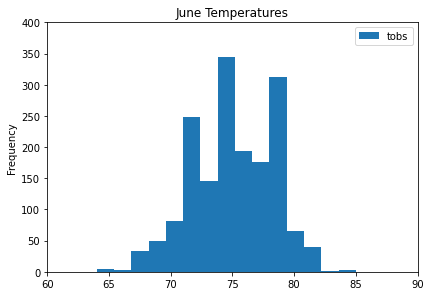

In [8]:
june_df.plot.hist(bins=15)
plt.tight_layout()
plt.title('June Temperatures')
plt.xlim([60,90])
plt.ylim([0,400])

(0.0, 400.0)

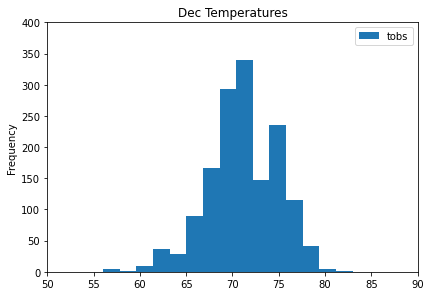

In [9]:
dec_df.plot.hist(bins=15)
plt.tight_layout()
plt.title('Dec Temperatures')
plt.xlim([50,90])
plt.ylim([0,400])

In [10]:
june_temp_prcp = []
june_temp_prcp = session.query(Measurement.tobs, Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()
june_temp_prcp_df = pd.DataFrame(june_temp_prcp, columns = ['temp','prcp'])
june_temp_prcp_df.describe()

,temp,prcp
count,1700.000000,1574.000000
mean,74.944118,0.136360
std,3.257417,0.335731
min,64.000000,0.000000
25%,73.000000,0.000000
50%,75.000000,0.020000
75%,77.000000,0.120000
max,85.000000,4.430000


(0.0, 8.0)

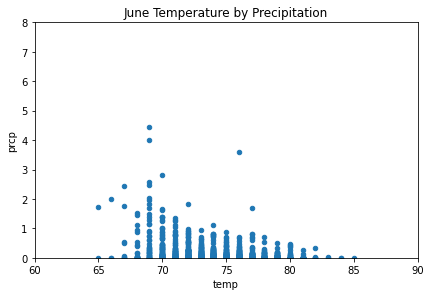

In [11]:
june_temp_prcp_df.plot.scatter('temp','prcp')
plt.tight_layout()
plt.title('June Temperature by Precipitation')
plt.xlim([60,90])
plt.ylim([0,8])

In [12]:
dec_temp_prcp = []
dec_temp_prcp = session.query(Measurement.tobs, Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()
dec_temp_prcp_df = pd.DataFrame(dec_temp_prcp, columns = ['temp','prcp'])
dec_temp_prcp_df.describe()

,temp,prcp
count,1517.000000,1405.000000
mean,71.041529,0.216819
std,3.745920,0.541399
min,56.000000,0.000000
25%,69.000000,0.000000
50%,71.000000,0.030000
75%,74.000000,0.150000
max,83.000000,6.420000


(0.0, 8.0)

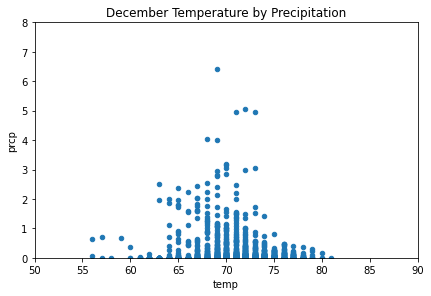

In [13]:
dec_temp_prcp_df.plot.scatter('temp','prcp')
plt.tight_layout()
plt.title('December Temperature by Precipitation')
plt.xlim([50,90])
plt.ylim([0,8])